In [1]:
import numpy as np

# Activation Function

In [1]:
# numpy
def step_function(x):
    return x>0

def sigmoid(x):
    return 1/1+np.exp(-x)

def ReLU(x):
    return np.max(0, x)

def softmax(x):
    exp_sum = np.sum(np.exp(x))
    return x/exp_sum

# pytorch 
def step_function(x):
    return x>0

def sigmoid(x):
    return 1/1+torch.exp(-x)

def ReLU(x):
    return torch.maximum(0, x)

def softmax(x):
    c = torch.max(x) 
    exp_sum = torch.sum(torch.exp(x-c)) # overflow 대책
    return x/exp_sum

In [2]:
def step_function(x):
    """
    Return step function output
    return=1 if >0
    return=0 if x<=0
    
    Parameter
    ---------
    x : numpy array
    
    Return
    ------
    result: numpy array
      - consists of 0 or 1
    
    """
    y = x>0
    return y.astype(np.int64)

In [3]:
def sigmoid(x):
    """
    return sigmoid output
    """
    result = 1/(1+np.exp(-x))
    return result
    

In [4]:
def relu(x):
    """
    return ReLU output
    """
    result = x if x >0 else 0
    return result

## softmax는 좀 특별한 처리가 필요합니다.
- <span style = 'font-size:1.2em;line-height:1.5em'>원래 정의에 따르면 다음과 같이 정의되어 아래 셀과 같이 구현 가능하죠</span>
<span style = 'font-size:1.5em;line-height:1.8em'>$$y_k = {e^{a_k}\over\Sigma_{i=1}^{n}e^{a_i}}$$</span>

In [5]:
def softmax(x):
    exp_sum = np.sum(np.exp(x))
    result = x/exp_sum
    return result

- <span style = 'font-size:1.2em;line-height:1.5em'>근데 얘를 실제로 다음과 같이 조금은 큰 수를 넣어서 계산하면 이상한 결과가 나옵니다.</span>

In [6]:
softmax(np.array([1000,1010,990]))

/var/folders/vc/qmhd_frs3436xpj2_4dshbtw0000gn/T/ipykernel_70434/1978982483.py:2: RuntimeWarning: overflow encountered in exp
  exp_sum = np.sum(np.exp(x))


array([0., 0., 0.])

- <span style = 'font-size:1.2em;line-height:1.5em'>이는 exp(1000)등의 숫자가 엄청나게 커서 컴퓨터가 처리할 수 있는 범위를 넘었기 때분입니다.</span>

In [7]:
np.exp(1000)

/var/folders/vc/qmhd_frs3436xpj2_4dshbtw0000gn/T/ipykernel_70434/2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

- <span style = 'font-size:1.2em;line-height:1.5em'>그래서 약간의 trick을 써줍니다.</span>
<span style = 'font-size:1.5em;line-height:2.0em'>$$y_k = {e^{a_k}\over\Sigma_{i=1}^{n}e^{a_i}}$$</span>
<span style = 'font-size:1.5em;line-height:2.0em'>$$    = {C*e^{a_k}\over \Sigma_{i=1}^{n}C*e^{a_i}}$$</span>
<span style = 'font-size:1.5em;line-height:2.0em'>$$    = {e^{a_k+logC}\over\Sigma_{i=1}^{n}e^{a_i+logC}}$$</span>
<span style = 'font-size:1.5em;line-height:2.0em'>$$    = {e^{a_k+C''}\over\Sigma_{i=1}^{n}e^{a_i+C''}}$$</span>

- <span style = 'font-size:1.2em;line-height:1.5em'>여기서 $C''$는 입력한 값의 -max를 적어주는 거죠</span>

<span style = 'font-size:1.2em;line-height:1.5em'>이렇게 하면 아까 출력이 안되었던 값도 출력이 됩니다.</span>

In [8]:
def softmax(x):
    c=np.max(x)
    exp_x = np.exp(x-c) # overflow 대책
    exp_sum = np.sum(exp_x)
    result = exp_x/exp_sum
    return result

In [9]:
softmax(np.array([1000,1010,990]))

array([4.53978686e-05, 9.99954600e-01, 2.06106005e-09])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x = np.arange(-3,3,0.001)
y1 = [sigmoid(a) for a in x]
y2 = [step_function(a) for a in x]
y3 = [relu(a) for a in x]

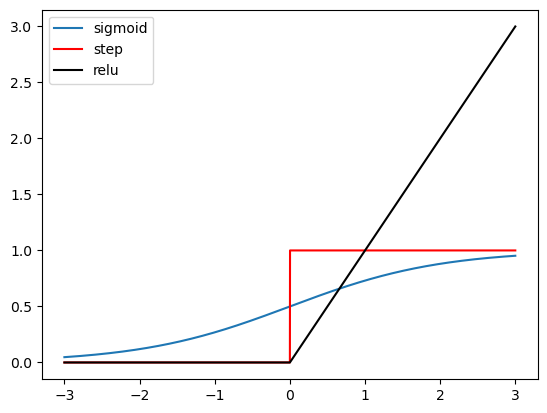

In [12]:
plt.plot(x,y1)
plt.plot(x,y2, c='r')
plt.plot(x,y3, c='k')
plt.legend(['sigmoid','step', 'relu'])

## Activation function은 앞으로 자주 사용할 예정 -> .py 스크립트 파일로 따로 만들게요!

# 자, 이제 저희가 사용할 mnist data를 좀 만져볼게요!
- <span style = 'font-size:1.2em;line-height:1.5em'>MNIST 소개: https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset</span>

## MNIST 데이터를 다룰때 필요한 코드는 별도의 mnist.py script 파일로 준비해두었습니다.
- <span style = 'font-size:1.2em;line-height:1.5em'>(출처: https://github.com/WegraLee/deep-learning-from-scratch)</span>

In [13]:
# mnist.py에서 우리가 실제로 사용할 load_mnist함수만 불러올게요
from mnist import load_mnist

In [14]:
(x_trn, y_trn), (x_tst, y_tst) = load_mnist(flatten=True, normalize=False)

In [15]:
x_trn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
print(x_trn.shape, y_trn.shape)

(60000, 784) (60000,)


In [17]:
print(x_tst.shape, y_tst.shape)

(10000, 784) (10000,)


In [18]:
print(x_trn[0].shape)

(784,)


## 데이터가 어떻게 생겼는지 궁금하니까 한번 볼게요!

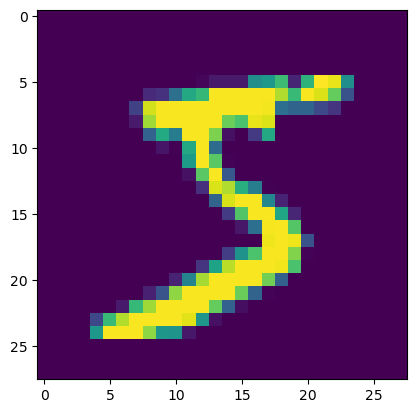

In [19]:
plt.imshow(x_trn[0].reshape(-1,28))

## 0부터 9까지 어떻게 생겼는지 한번 예시로 볼게요!

In [20]:
np.argwhere(y_tst==1).reshape(-1)

array([   2,    5,   14, ..., 9978, 9984, 9994])

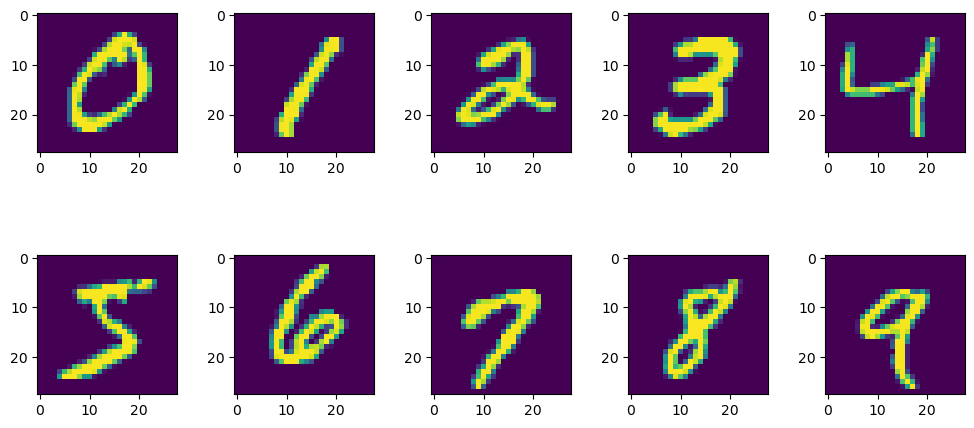

In [23]:
n_rows=2
n_cols=5
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,5))
plt.tight_layout()
for i in range(0,10):
    row_num = int(i/n_cols)
    col_num = int(i%n_cols)
    
    idxs = np.argwhere(y_trn==i).reshape(-1)
    idx = idxs[0]
    ax[row_num, col_num].imshow(x_trn[idx].reshape(-1,28))

# 연습문제

<span style = 'font-size:1.2em;line-height:1.5em'>1.위에서 작성했던 numpy 기반의 activation함수들을 Pytorch기반의 코드로 변환하세요.</span>